<a id='top'></a>

<a href='#import'>Import &amp; Inspect</a> | <a href='#user'>User Data</a> | <a href='#group'>Group Name Data</a> | <a href='#act'>ACT Data</a> | <a href='#gmat'>GMAT Data</a> | <a href='#sat'>SAT Data</a> | <a href='#stats'>Statistical Analysis</a>
    
<br>

---


# Academic Mastery Study - Exploratory Data Analysis

**Improve academic evaluations by predicting whether a student will answer the next test question correctly.** Students taking advantage of practice exercises through various software applications seek an evaluation of their preparedness for formal academic assessments. They would like an an accurate evaluation of any gaps in knowledge and skills without sitting through exercises that repeatedly test established proficiencies and difficulties. The goal is to help test developers build an application that precisely evaluates competencies so that fewer demonstrations of proficiency can accurately determine mastery.

## DATA WRANGLING
---
The [`initial_data_exploration`](initial_data_exploration.ipynb) notebook contains the following work:

Download the `grockit_all_data.zip` data file from the [Grockit competition on Kaggle](https://www.kaggle.com/c/WhatDoYouKnow/data). Import and inspect the raw `training.csv` data, isolate relevant variables, calculate new variables, organize the dataframe, and resolve missing, invalid, corrupted or duplicate values. Begin creating data visualizations to inspect variables and analyze outliers.

From that notebook, the clean dataframe was saved in the file `clean_training.csv`, which is used for work in this notebook.

## EXPLORATORY DATA ANALYSIS
---
Continue with data visualization, using plots to gain insights, look for correlations, consider a hypothesis to explore, then leverage statistical inference to test the hypothesis.

<a href='#top' id='import'>back to menu</a>

### Import Packages & Clean Training Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
from scipy import stats

# Set the plot style:
sns.set_style('whitegrid')

In [2]:
# Read and save CSV file a as dataframe:
df = pd.read_csv('../data/interim/clean_training.csv').drop('Unnamed: 0', axis='columns')

### Inspect Clean Data

In [3]:
# Inspect the current state of the dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4679166 entries, 0 to 4679165
Data columns (total 24 columns):
user_id             int64
round_started_at    object
answered_at         object
deactivated_at      object
round_ended_at      object
question_id         int64
correct             int64
group_name          int64
track_name          int64
subtrack_name       int64
tag_ids             object
question_type       int64
game_type           int64
num_players         int64
round_duration      object
tag_0               int64
tag_1               int64
tag_2               int64
tag_3               int64
tag_4               int64
tag_5               int64
tag_6               int64
tag_7               int64
tag_8               int64
dtypes: int64(18), object(6)
memory usage: 856.8+ MB


Relevant variables need to be converted to datetime, timedelta and category types.

In [4]:
# Set options to inspect ALL of the columns:
pd.options.display.max_columns = 25

# Inspect the structure and first 5 observations of the clean dataset:
df.head()

,user_id,round_started_at,answered_at,deactivated_at,round_ended_at,question_id,correct,group_name,track_name,subtrack_name,tag_ids,question_type,game_type,num_players,round_duration,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
0,85818,2010-08-18 20:17:13,2010-08-18 20:18:18,2010-08-18 20:18:18,2010-08-18 20:18:18,5560,0,1,5,14,"['222', '233', '240', '246']",0,7,1,0 days 00:01:05.000000000,222,233,240,246,0,0,0,0,0
1,85818,2010-08-18 20:19:12,2010-08-18 20:20:34,2010-08-18 20:20:34,2010-08-18 20:20:34,4681,1,1,5,0,"['24', '49']",0,7,1,0 days 00:01:22.000000000,24,49,0,0,0,0,0,0,0
2,85818,2010-08-18 20:20:42,2010-08-18 20:21:56,2010-08-18 20:21:56,2010-08-18 20:21:56,1529,1,1,5,0,"['31', '49']",0,7,1,0 days 00:01:14.000000000,31,49,0,0,0,0,0,0,0
3,85818,2010-08-18 20:22:03,2010-08-18 20:23:05,2010-08-18 20:23:05,2010-08-18 20:23:05,2908,1,1,5,0,"['31', '49']",0,7,1,0 days 00:01:02.000000000,31,49,0,0,0,0,0,0,0
4,85818,2010-08-18 20:23:11,2010-08-18 20:26:08,2010-08-18 20:26:08,2010-08-18 20:26:08,1773,1,1,5,11,"['183', '194', '207']",0,7,1,0 days 00:02:57.000000000,183,194,207,0,0,0,0,0,0


In [5]:
# Inspect the last 5 observations:
df.tail()

,user_id,round_started_at,answered_at,deactivated_at,round_ended_at,question_id,correct,group_name,track_name,subtrack_name,tag_ids,question_type,game_type,num_players,round_duration,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
4679161,58569,2009-10-18 17:08:32,2009-10-18 17:09:06,2009-10-18 17:09:06,2009-10-18 17:09:06,1633,1,1,4,9,"['47', '82', '118', '161']",0,7,1,0 days 00:00:34.000000000,47,82,118,161,0,0,0,0,0
4679162,58569,2009-10-18 17:09:24,NaN,2009-10-18 17:10:03,2009-10-18 17:10:03,1775,0,1,4,1,"['4', '52', '135', '262']",0,7,1,0 days 00:00:39.000000000,4,52,135,262,0,0,0,0,0
4679163,131842,2010-04-19 23:13:02,NaN,2010-04-19 23:13:37,2010-04-19 23:13:37,1655,0,2,8,5,"['106', '130', '164']",0,7,5,0 days 00:00:35.000000000,106,130,164,0,0,0,0,0,0
4679164,131842,2010-04-19 23:13:48,NaN,2010-04-19 23:14:35,2010-04-19 23:14:35,544,0,2,8,3,"['101', '103', '134', '280']",0,7,5,0 days 00:00:47.000000000,101,103,134,280,0,0,0,0,0
4679165,52513,2010-05-18 14:32:59,NaN,2010-05-18 14:35:15,2010-05-18 14:35:15,1272,0,2,7,13,"['239', '245']",0,7,1,0 days 00:02:16.000000000,239,245,0,0,0,0,0,0,0


In [6]:
# Create and save list of columns to convert to datetime:
time_columns = ['round_started_at', 'answered_at', 'deactivated_at', 'round_ended_at']

# Loop through the time_columns list:
for column in time_columns:
    # Convert date columns to datetime objects; 
    # need to ‘coerce’ errors, since there are known NULL values:
    df[column] = pd.to_datetime(df[column], errors='coerce')

In [7]:
# Convert round_duration to timedelta:
df['round_duration'] = pd.to_timedelta(df.round_duration, unit='s')

In [8]:
# Define a generic replace function -

def code_values(column, code_dictionary):
    """Return a column of codes defined in a dictionary."""
    
    # Initialize the replacement column:
    coded_column = pd.Series(column, copy=True)
    
    # Loop throught the provided dictionary:
    for key, value in code_dictionary.items():
        
        # Replace key with the value within the original column:
        coded_column.replace(key, value, inplace=True)
        
    return coded_column

In [9]:
# Add a more semantic column related to the 'correct' column -

# Save dictionary with codes and semantic values:
outcome = {0: 'incorrect', 1: 'correct'}

# Copy the 'correct' column and save, then convert:
df['outcome'] = df.correct
df.outcome = code_values(df.outcome, outcome)

# Confirm the changes:
df.head()

,user_id,round_started_at,answered_at,deactivated_at,round_ended_at,question_id,correct,group_name,track_name,subtrack_name,tag_ids,question_type,game_type,num_players,round_duration,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
0,85818,2010-08-18 20:17:13,2010-08-18 20:18:18,2010-08-18 20:18:18,2010-08-18 20:18:18,5560,0,1,5,14,"['222', '233', '240', '246']",0,7,1,00:01:05,222,233,240,246,0,0,0,0,0,incorrect
1,85818,2010-08-18 20:19:12,2010-08-18 20:20:34,2010-08-18 20:20:34,2010-08-18 20:20:34,4681,1,1,5,0,"['24', '49']",0,7,1,00:01:22,24,49,0,0,0,0,0,0,0,correct
2,85818,2010-08-18 20:20:42,2010-08-18 20:21:56,2010-08-18 20:21:56,2010-08-18 20:21:56,1529,1,1,5,0,"['31', '49']",0,7,1,00:01:14,31,49,0,0,0,0,0,0,0,correct
3,85818,2010-08-18 20:22:03,2010-08-18 20:23:05,2010-08-18 20:23:05,2010-08-18 20:23:05,2908,1,1,5,0,"['31', '49']",0,7,1,00:01:02,31,49,0,0,0,0,0,0,0,correct
4,85818,2010-08-18 20:23:11,2010-08-18 20:26:08,2010-08-18 20:26:08,2010-08-18 20:26:08,1773,1,1,5,11,"['183', '194', '207']",0,7,1,00:02:57,183,194,207,0,0,0,0,0,0,correct


In [10]:
# Create and save list of columns to convert to categorical data type:
category_columns = [
    'group_name', 
    'track_name', 
    'subtrack_name', 
    'question_type', 
    'game_type', 
    'num_players',
    'outcome',
    'tag_0','tag_1','tag_2','tag_3','tag_4','tag_5','tag_6','tag_7','tag_8'
]

# Loop through the category_columns list:
for column in category_columns:
    # Convert column to category type:
    df[column] = df[column].astype('category')

In [11]:
# Confirm the null count:
df.isnull().sum() 

user_id                  0
round_started_at         0
answered_at         511154
deactivated_at          10
round_ended_at           0
question_id              0
correct                  0
group_name               0
track_name               0
subtrack_name            0
tag_ids                  0
question_type            0
game_type                0
num_players              0
round_duration           0
tag_0                    0
tag_1                    0
tag_2                    0
tag_3                    0
tag_4                    0
tag_5                    0
tag_6                    0
tag_7                    0
tag_8                    0
outcome                  0
dtype: int64

There are 44,844 fewer NULL values for `answered_at` in this dataset than indicated in the last inspection of such in the previous notebook, but that count was obtained before more records were dropped for other reasons related to time. 

Again, observations where both `answered_at` and `deactivated_at` values are NULL were eliminated. Either variable provides the necessary information for `round_ended_at`, so ignoring one of the two is not a problem.

In [12]:
# Re-inspect the state and structure of the dataframe:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4679166 entries, 0 to 4679165
Data columns (total 25 columns):
user_id             int64
round_started_at    datetime64[ns]
answered_at         datetime64[ns]
deactivated_at      datetime64[ns]
round_ended_at      datetime64[ns]
question_id         int64
correct             int64
group_name          category
track_name          category
subtrack_name       category
tag_ids             object
question_type       category
game_type           category
num_players         category
round_duration      timedelta64[ns]
tag_0               category
tag_1               category
tag_2               category
tag_3               category
tag_4               category
tag_5               category
tag_6               category
tag_7               category
tag_8               category
outcome             category
dtypes: category(16), datetime64[ns](4), int64(3), object(1), timedelta64[ns](1)
memory usage: 415.1+ MB
None


,user_id,round_started_at,answered_at,deactivated_at,round_ended_at,question_id,correct,group_name,track_name,subtrack_name,tag_ids,question_type,game_type,num_players,round_duration,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
0,85818,2010-08-18 20:17:13,2010-08-18 20:18:18,2010-08-18 20:18:18,2010-08-18 20:18:18,5560,0,1,5,14,"['222', '233', '240', '246']",0,7,1,00:01:05,222,233,240,246,0,0,0,0,0,incorrect
1,85818,2010-08-18 20:19:12,2010-08-18 20:20:34,2010-08-18 20:20:34,2010-08-18 20:20:34,4681,1,1,5,0,"['24', '49']",0,7,1,00:01:22,24,49,0,0,0,0,0,0,0,correct
2,85818,2010-08-18 20:20:42,2010-08-18 20:21:56,2010-08-18 20:21:56,2010-08-18 20:21:56,1529,1,1,5,0,"['31', '49']",0,7,1,00:01:14,31,49,0,0,0,0,0,0,0,correct
3,85818,2010-08-18 20:22:03,2010-08-18 20:23:05,2010-08-18 20:23:05,2010-08-18 20:23:05,2908,1,1,5,0,"['31', '49']",0,7,1,00:01:02,31,49,0,0,0,0,0,0,0,correct
4,85818,2010-08-18 20:23:11,2010-08-18 20:26:08,2010-08-18 20:26:08,2010-08-18 20:26:08,1773,1,1,5,11,"['183', '194', '207']",0,7,1,00:02:57,183,194,207,0,0,0,0,0,0,correct


In [13]:
# Display statistics for numerical variables:
df.describe()

,user_id,question_id,correct,round_duration
count,4.679166e+06,4.679166e+06,4.679166e+06,4679166
mean,8.975790e+04,3.014729e+03,5.542445e-01,0 days 00:01:07.452851
std,5.156293e+04,1.721107e+03,4.970489e-01,0 days 00:00:53.989559
min,0.000000e+00,0.000000e+00,0.000000e+00,0 days 00:00:05
25%,4.483700e+04,1.529000e+03,0.000000e+00,0 days 00:00:28
50%,9.056800e+04,2.987000e+03,1.000000e+00,0 days 00:00:53
75%,1.334800e+05,4.475000e+03,1.000000e+00,0 days 00:01:33
max,1.791050e+05,6.045000e+03,1.000000e+00,0 days 00:10:00


In [14]:
# Filter columns for category datatype and display the statistics:
categorical = df.dtypes[df.dtypes == 'category'].index
df[categorical].describe()

,group_name,track_name,subtrack_name,question_type,game_type,num_players,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
count,4679166,4679166,4679166,4679166,4679166,4679166,4679166,4679166,4679166,4679166,4679166,4679166,4679166,4679166,4679166,4679166
unique,3,9,16,2,11,33,133,207,214,182,129,78,43,17,4,2
top,1,5,9,0,7,1,4,49,0,0,0,0,0,0,0,correct
freq,2319061,1204729,700932,4498607,2993960,3095229,523563,285842,812897,1924843,3274990,4179167,4529579,4650817,4675716,2593402


### Things to Explore and Keep in Mind:

User Data
* Number of Questions per User
* Determine the ratio of correct answers and the average of round durations for each user in the clean dataset.
* Distribution of User Scores (Ratios of Correct Answers)
* Distribution of User Round Duration Averages
* Is there a correlation between user scores and round duration averages?
* Is there a correlation between user scores and number of questions attempted?

Group Names Data
* Investigate overlap of variables between test groups.
* Create dataframes for each test group (ACT, GMAT, SAT) and inspect.

Per Test Group
* Number of Questions per User
* Determine the ratio of correct answers and the average of round durations for each user in the clean dataset.
* Distribution of User Scores (Ratios of Correct Answers)
* Distribution of User Round Duration Averages
* Is there a correlation between user scores and round duration averages?
* Is there a correlation between user scores and number of questions attempted?
* Distribution of correct/incorrect observations for each track, subtrack.

In [15]:
# Define a function to save dataframes by user_id with correct_ratio, mean round duration -

def user_data(df):
    """Return a dataframe grouped by user_id with a column for the calculated correct ratio
    and another of the user's round duration average."""
    
    # Save the total number of entries per user in the 'correct' column:
    question_count = df.groupby('user_id')['correct'].count()

    # Save the total number of correct entries per user in the 'correct' column;
    # values are 0 (incorrect) and 1 (correct), so a sum of values in the column will do:
    correct_answer_count = df.groupby('user_id')['correct'].sum()

    # Save the total number of incorrect entries per user by subracting correct from total:
    incorrect_answer_count = question_count.subtract(correct_answer_count)

    # Save the ratio of correct answers per user, dividing by total:
    ratio = correct_answer_count/question_count
    
    
    # Get and save the sum of each user's round duration:
    user_time = df.groupby('user_id')['round_duration'].sum()
    
    # Calculate and save the mean round duration per user:
    user_time_average = user_time/question_count
    

    # Build and save the dictionary to look at user data:
    new_data = {
        'num_questions': question_count,
        'num_correct': correct_answer_count,
        'num_incorrect': incorrect_answer_count,
        'correct_ratio': ratio,
        'round_duration_average': user_time_average
    }
    
    # Build dataframe from new_data dictionary:
    df = pd.DataFrame(new_data)
    
    # Reorder the columns:
    df = df[['num_correct', 'num_incorrect', 'num_questions', 'correct_ratio', 'round_duration_average']]
    
    return df

In [16]:
# Define a function to compute the CDF:

def cdf(data):
    """Compute CDF for a one-dimensional array of measurements."""

    # Number of data points:
    n = len(data)

    # x-data for the CDF:
    x = np.sort(data)

    # y-data for the CDF:
    y = np.arange(1, n+1) / n

    return x, y

### User Data

This is data for the entire clean dataset. Later, it is filtered for users attempting 30 or more questions.

[Initial exploration](http://nbviewer.jupyter.org/github/humburgc/academic_mastery_study/blob/master/notebooks/initial_data_exploration.ipynb#users) revealed that a small percent of users attempted a large number of questions and a large percent attempted a small number of questions:

![Number of Questions Per User](../reports/figures/initial_data_exploration/questions_per_user.png)

In [17]:
# Confirm the count of users:
print( ("Number of Users: "), len(df.user_id.value_counts()) )

Number of Users:  178342


#### Determine the ratio of correct answers and the average of round durations for each user in the clean dataset:

In [18]:
# Build a dataframe of user data for the entire dataset:
df_users = user_data(df)

# Inspect:
print(df_users.info())
df_users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178342 entries, 0 to 179105
Data columns (total 5 columns):
num_correct               178342 non-null int64
num_incorrect             178342 non-null int64
num_questions             178342 non-null int64
correct_ratio             178342 non-null float64
round_duration_average    178342 non-null timedelta64[ns]
dtypes: float64(1), int64(3), timedelta64[ns](1)
memory usage: 8.2 MB
None


,num_correct,num_incorrect,num_questions,correct_ratio,round_duration_average
user_id,,,,,
0,5,2,7,0.714286,00:00:26.714285
1,6,8,14,0.428571,00:01:33.214285
2,2,6,8,0.250000,00:00:58.375000
3,3,4,7,0.428571,00:01:07.428571
4,7,4,11,0.636364,00:00:39


#### Distribution of User Scores (Ratios of Correct Answers):

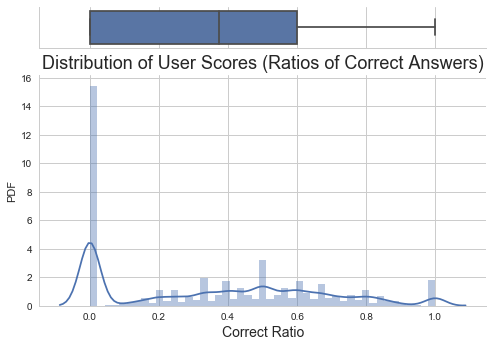

In [19]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for correct_ratio:
sns.boxplot(df_users.correct_ratio, ax=boxplot)

# Add histogram for correct_ratio:
sns.distplot(df_users.correct_ratio, ax=histogram)

# Label axes and add title:
plt.xlabel('Correct Ratio', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of User Scores (Ratios of Correct Answers)', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Minimize the plot frame:
sns.despine()

# Display the plots:
plt.show()

In [20]:
# Compute and save variables for summarizing the empirical distribution -

# Sample Size:
n = len(df_users.correct_ratio)

# Sample Mean:
M = np.mean(df_users.correct_ratio)

# Sample Standard Deviation:
s = np.std(df_users.correct_ratio)

print('n =', n, '\nM =', M, '\ns =', s)

n = 178342 
M = 0.3569648637617248 
s = 0.308860348997357


In [21]:
# Seed the random number generator:
np.random.seed(42)


# Simulate a random sample with the same statistics and size of 10,000:
normal = np.random.normal(M, s, 10000)
normal

array([ 0.51038017,  0.3142605 ,  0.55701017, ...,  0.13912049,
        0.51008719,  0.55599091])

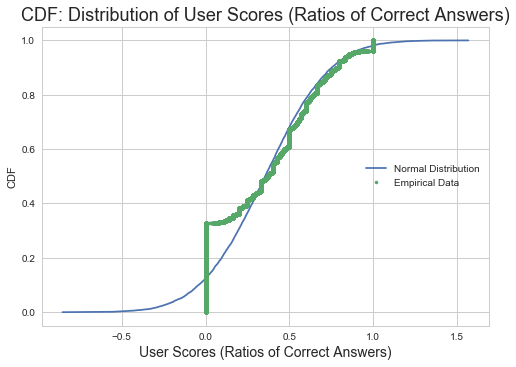

In [22]:
# Compute CDFs:
x_score, y_score = cdf(df_users.correct_ratio)
x_norm, y_norm = cdf(normal)

# Plot both CDFs on the same plot:
fig = plt.plot(x_norm, y_norm)
fig = plt.plot(x_score, y_score, marker='.', linestyle='none')

# Label axes and add legend and a title:
fig = plt.xlabel('User Scores (Ratios of Correct Answers)', fontsize=14)
fig = plt.ylabel('CDF')
fig = plt.legend(('Normal Distribution', 'Empirical Data'), loc='center right')
fig = plt.title('CDF: Distribution of User Scores (Ratios of Correct Answers)', fontsize=18)


# Display the plots:
plt.show()

#### Distribution of User Round Duration Averages:

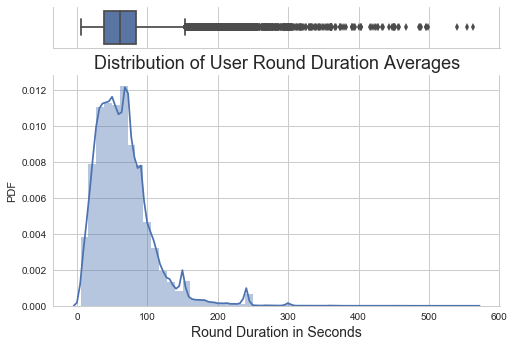

In [23]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for round_duration_average:
sns.boxplot(df_users['round_duration_average']/np.timedelta64(1, 's'), ax=boxplot)

# Add histogram for round_duration_average:
sns.distplot(df_users['round_duration_average']/np.timedelta64(1, 's'), ax=histogram)

# Label axes and add title:
plt.xlabel('Round Duration in Seconds', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of User Round Duration Averages', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Minimize the plot frame:
sns.despine()

# Display the plots:
plt.show()

#### Is there a correlation between user scores and round duration averages?

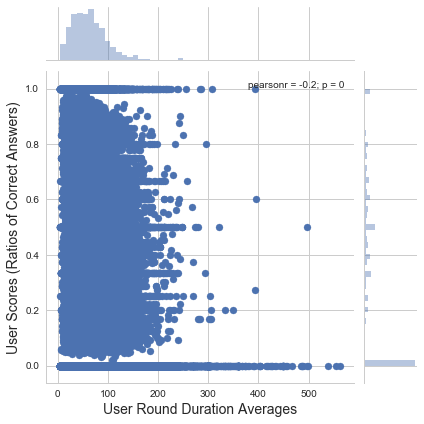

In [24]:
# Quick view of possible relationship between correct ration and round duration:
fig = sns.jointplot(df_users['round_duration_average']/np.timedelta64(1, 's'), df_users.correct_ratio)

# Label axes:
fig.set_axis_labels('User Round Duration Averages', 'User Scores (Ratios of Correct Answers)',  fontsize=14)

# Display the plot:
plt.show()

#### Is there a correlation between user scores and number of questions attempted?

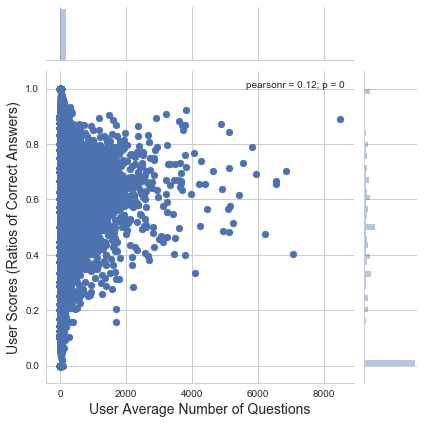

In [25]:
# Quick view of possible relationship between correct ration and round duration:
fig = sns.jointplot(df_users.num_questions, df_users.correct_ratio)

# Label axes:
fig.set_axis_labels('User Average Number of Questions', 'User Scores (Ratios of Correct Answers)', fontsize=14)

# Display the plot:
plt.show()

### Unique Question Data

This is data for the entire clean dataset.

In [26]:
# Confirm the count of unique questions:
print(("Number of Unique Questions: "), (len( df.question_id.unique() )))

Number of Unique Questions:  6045


Also from initial exploration of the dataset:

![Number of Questions Per question_id](../reports/figures/initial_data_exploration/questions_per_questionid.png)

The long tail here was more unexpected. Perhaps the questions with low frequency are grouped somehow that explains why they are underrepresented.

### Time Data

This is data for the entire clean dataset.

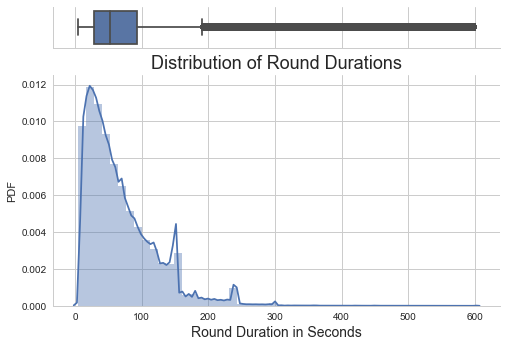

In [27]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for round_duration:
sns.boxplot(df['round_duration']/np.timedelta64(1,'s'), ax=boxplot)

# Add histogram for round_duration:
sns.distplot(df['round_duration']/np.timedelta64(1,'s'), ax=histogram)

# Label axes and add title:
plt.xlabel('Round Duration in Seconds', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of Round Durations', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Minimize the plot frame:
sns.despine()

# Display the plots:
plt.show()

The distribution of round durations (time taken to attempt a question), is expected. Outliers are present, but most rounds took less than 100 seconds; that a small percent of rounds took much longer to complete seems normal.

---
Other than round duration, distributions for a number of features across the entire dataset do not appear normal. No relationships stand out as obvious, or strong. All of this reinforced the inclination to look at data by group names. However a first pass of all work under Group Name Data (later in this notebook) returned similar patterns that seem to be related to users attempting very few questions. For the sake of getting a look at the data without these possible outliers, the clean dataframe is filtered for users attempting 30 or more questions. The remaining work in this notebook is under that condition:

In [28]:
# Filter df for users attempting 30 or more questions and save:
df = df.groupby('user_id').filter(lambda x: x['user_id'].count() >= 30)

# Inspect state and structure of filtered dataframe:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3631603 entries, 0 to 4679109
Data columns (total 25 columns):
user_id             int64
round_started_at    datetime64[ns]
answered_at         datetime64[ns]
deactivated_at      datetime64[ns]
round_ended_at      datetime64[ns]
question_id         int64
correct             int64
group_name          category
track_name          category
subtrack_name       category
tag_ids             object
question_type       category
game_type           category
num_players         category
round_duration      timedelta64[ns]
tag_0               category
tag_1               category
tag_2               category
tag_3               category
tag_4               category
tag_5               category
tag_6               category
tag_7               category
tag_8               category
outcome             category
dtypes: category(16), datetime64[ns](4), int64(3), object(1), timedelta64[ns](1)
memory usage: 349.8+ MB
None


,user_id,round_started_at,answered_at,deactivated_at,round_ended_at,question_id,correct,group_name,track_name,subtrack_name,tag_ids,question_type,game_type,num_players,round_duration,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
0,85818,2010-08-18 20:17:13,2010-08-18 20:18:18,2010-08-18 20:18:18,2010-08-18 20:18:18,5560,0,1,5,14,"['222', '233', '240', '246']",0,7,1,00:01:05,222,233,240,246,0,0,0,0,0,incorrect
1,85818,2010-08-18 20:19:12,2010-08-18 20:20:34,2010-08-18 20:20:34,2010-08-18 20:20:34,4681,1,1,5,0,"['24', '49']",0,7,1,00:01:22,24,49,0,0,0,0,0,0,0,correct
2,85818,2010-08-18 20:20:42,2010-08-18 20:21:56,2010-08-18 20:21:56,2010-08-18 20:21:56,1529,1,1,5,0,"['31', '49']",0,7,1,00:01:14,31,49,0,0,0,0,0,0,0,correct
3,85818,2010-08-18 20:22:03,2010-08-18 20:23:05,2010-08-18 20:23:05,2010-08-18 20:23:05,2908,1,1,5,0,"['31', '49']",0,7,1,00:01:02,31,49,0,0,0,0,0,0,0,correct
4,85818,2010-08-18 20:23:11,2010-08-18 20:26:08,2010-08-18 20:26:08,2010-08-18 20:26:08,1773,1,1,5,11,"['183', '194', '207']",0,7,1,00:02:57,183,194,207,0,0,0,0,0,0,correct


In [29]:
df.tail()

,user_id,round_started_at,answered_at,deactivated_at,round_ended_at,question_id,correct,group_name,track_name,subtrack_name,tag_ids,question_type,game_type,num_players,round_duration,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
4679105,143359,2010-10-02 02:32:35,NaT,2010-10-02 02:33:25,2010-10-02 02:33:25,719,0,2,6,7,"['5', '71', '131', '138']",0,7,5,00:00:50,5,71,131,138,0,0,0,0,0,incorrect
4679106,143359,2010-10-02 02:34:35,2010-10-02 02:34:56,2010-10-02 02:34:56,2010-10-02 02:34:56,2409,1,2,8,3,"['101', '103', '134', '275']",0,2,1,00:00:21,101,103,134,275,0,0,0,0,0,correct
4679107,143359,2010-10-02 02:34:58,2010-10-02 02:35:36,2010-10-02 02:35:36,2010-10-02 02:35:36,4613,0,2,8,3,"['101', '134', '275']",0,2,1,00:00:38,101,134,275,0,0,0,0,0,0,incorrect
4679108,143359,2010-10-02 02:35:38,2010-10-02 02:35:58,2010-10-02 02:35:58,2010-10-02 02:35:58,1272,1,2,7,13,"['239', '245']",0,2,1,00:00:20,239,245,0,0,0,0,0,0,0,correct
4679109,143359,2010-10-02 02:35:59,2010-10-02 02:36:11,2010-10-02 02:36:11,2010-10-02 02:36:11,2608,1,2,8,3,"['101', '103', '211', '275']",0,2,1,00:00:12,101,103,211,275,0,0,0,0,0,correct


<a href='#top' id='user'>back to menu</a>

### User Data

* Number of Questions per User
* Determine the ratio of correct answers and the average of round durations for each user in the clean dataset.
* Distribution of User Scores (Ratios of Correct Answers)
* Distribution of User Round Duration Averages
* Is there a correlation between user scores and round duration averages?
* Is there a correlation between user scores and number of questions attempted?

In [30]:
# Determine the number of users attempting 30 or more questions:
print( ("Number of Users Attempting 30 or More Questions: "), len(df.user_id.value_counts()) )

Number of Users Attempting 30 or More Questions:  20010


In [31]:
# Count and save the number of questions per user:
questions_per_user = df.user_id.value_counts()

# Convert to a dataframe, reset the index for future plotting and drop resulting extra column:
questions_per_user = questions_per_user.to_frame('question_count').reset_index().drop('index', axis='columns')

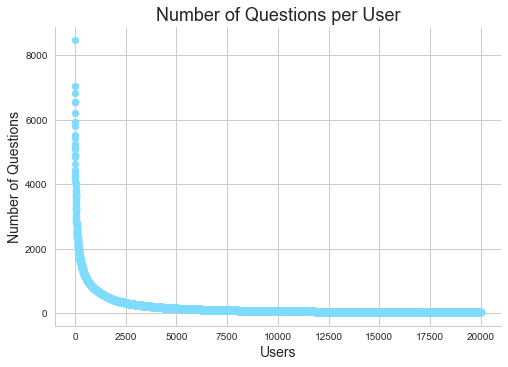

In [32]:
# Create questions_per_user scatter plot:
plt.scatter(questions_per_user.index, questions_per_user.question_count, color='#7fdbff')

# Create the labels and title of the plot:
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Number of Questions per User', fontsize=18)

# Minimize the plot frame:
sns.despine()

plt.show()  

#### Determine the ratio of correct answers and the average of round durations for each user in the clean dataset:

In [33]:
# Build a dataframe of user data for the entire dataset:
df_users = user_data(df)

# Inspect:
print(df_users.info())
df_users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20010 entries, 5 to 179086
Data columns (total 5 columns):
num_correct               20010 non-null int64
num_incorrect             20010 non-null int64
num_questions             20010 non-null int64
correct_ratio             20010 non-null float64
round_duration_average    20010 non-null timedelta64[ns]
dtypes: float64(1), int64(3), timedelta64[ns](1)
memory usage: 938.0 KB
None


,num_correct,num_incorrect,num_questions,correct_ratio,round_duration_average
user_id,,,,,
5,29,32,61,0.475410,00:00:39.295081
6,19,21,40,0.475000,00:00:55.950000
22,39,10,49,0.795918,00:01:14.938775
58,37,11,48,0.770833,00:01:09.958333
76,56,43,99,0.565657,00:00:48.818181


#### Distribution of User Scores (Ratios of Correct Answers):

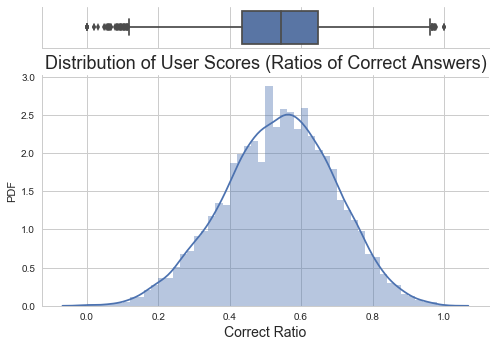

In [34]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for correct_ratio:
sns.boxplot(df_users.correct_ratio, ax=boxplot)

# Add histogram for correct_ratio:
sns.distplot(df_users.correct_ratio, ax=histogram)

# Label axes and add title:
plt.xlabel('Correct Ratio', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of User Scores (Ratios of Correct Answers)', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Minimize the plot frame:
sns.despine()

# Display the plots:
plt.show()

In [35]:
# Compute and save variables for summarizing the empirical distribution -

# Sample Size:
n = len(df_users.correct_ratio)

# Sample Mean:
M = np.mean(df_users.correct_ratio)

# Sample Standard Deviation:
s = np.std(df_users.correct_ratio)

print('n =', n, '\nM =', M, '\ns =', s)

n = 20010 
M = 0.5386273696222849 
s = 0.15557156003472072


In [36]:
# Seed the random number generator:
np.random.seed(42)


# Simulate a random sample with the same statistics and size of 10,000:
normal = np.random.normal(M, s, 10000)
normal

array([ 0.61590197,  0.51711738,  0.63938929, ...,  0.42890015,
        0.61575439,  0.63887589])

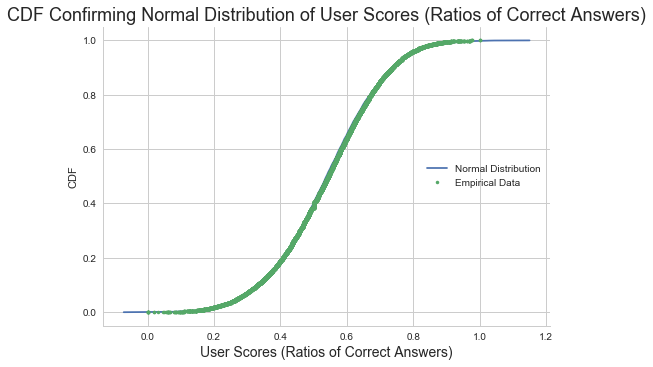

In [37]:
# Compute CDFs:
x_score, y_score = cdf(df_users.correct_ratio)
x_norm, y_norm = cdf(normal)

# Plot both CDFs on the same plot:
fig = plt.plot(x_norm, y_norm)
fig = plt.plot(x_score, y_score, marker='.', linestyle='none')

# Label axes and add legend and a title:
fig = plt.xlabel('User Scores (Ratios of Correct Answers)', fontsize=14)
fig = plt.ylabel('CDF')
fig = plt.legend(('Normal Distribution', 'Empirical Data'), loc='center right')
fig = plt.title('CDF Confirming Normal Distribution of User Scores (Ratios of Correct Answers)', fontsize=18)

# Minimize the plot frame:
sns.despine()

# Save and display the plots:
plt.savefig('../reports/figures/exploratory_data_analysis/ecdf_user_scores.png')
plt.show()

#### Distribution of User Round Duration Averages:

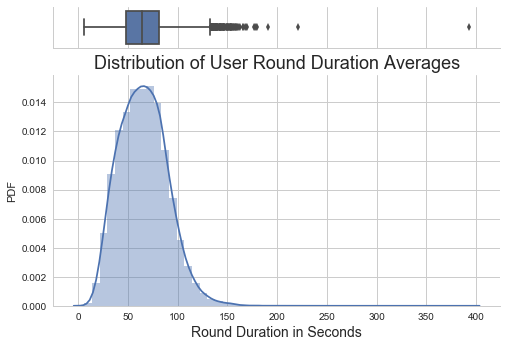

In [38]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for round_duration_average:
sns.boxplot(df_users['round_duration_average']/np.timedelta64(1, 's'), ax=boxplot)

# Add histogram for round_duration_average:
sns.distplot(df_users['round_duration_average']/np.timedelta64(1, 's'), ax=histogram)

# Label axes and add title:
plt.xlabel('Round Duration in Seconds', fontsize=14)
plt.ylabel('PDF')
plt.title('Distribution of User Round Duration Averages', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Minimize the plot frame:
sns.despine()

# Display the plots:
plt.show()

#### Is there a correlation between user scores and round duration averages?

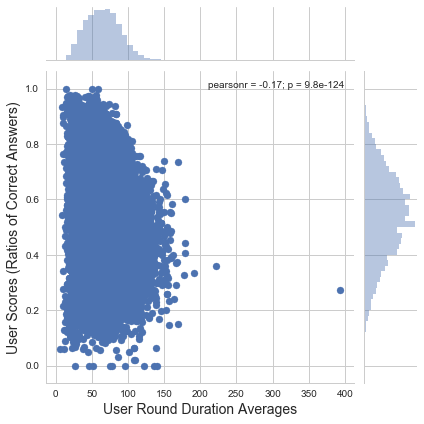

In [39]:
# Quick view of possible relationship between correct ration and round duration:
fig = sns.jointplot(df_users['round_duration_average']/np.timedelta64(1, 's'), df_users.correct_ratio)

# Label axes:
fig.set_axis_labels('User Round Duration Averages', 'User Scores (Ratios of Correct Answers)', fontsize=14)

# Display the plot:
plt.show()

#### Is there a correlation between user scores and number of questions attempted?

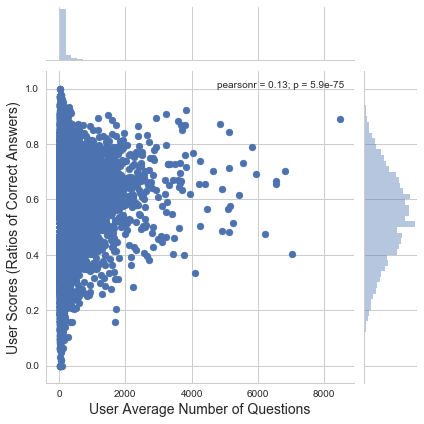

In [40]:
# Quick view of possible relationship between correct ration and round duration:
fig = sns.jointplot(df_users.num_questions, df_users.correct_ratio)

# Label axes:
fig.set_axis_labels('User Average Number of Questions', 'User Scores (Ratios of Correct Answers)', fontsize=14)

# Display the plot:
plt.show()

<a href='#top' id='group'>back to menu</a>

### Group Name Data

* Investigate overlap of variables between test groups.
* Create dataframes for each test group (ACT, GMAT, SAT) and inspect.

In [41]:
# Replace group codes with semantic values -

# Save dictionary with codes and semantic values:
groups = {0:'act', 1:'gmat', 2:'sat'}

# Convert and save:
df.group_name = code_values(df.group_name, groups)

In [42]:
# Get a view of tiered variables related to question groups:
group_tracks = pd.crosstab(index=df.subtrack_name,columns=[df.group_name, df.track_name])
group_tracks

group_name        act                          gmat             sat          \
track_name          0       1      2      3       4       5       6       7   
subtrack_name                                                                 
0                   0       0      0      0       0  302531       0       0   
1                   0       0      0      0  334617       0       0       0   
2              205713       0      0      0       0       0       0       0   
3                   0       0      0      0       0       0       0       0   
4                   0       0      0      0       0       0       0       0   
5                   0       0      0      0       0       0       0       0   
6                   0  146001      0      0       0       0       0       0   
7                   0       0      0      0       0       0  311343       0   
8                   0       0      0      0       0       0       0  145347   
9                   0       0      0      0  528912       0       0       0   
10                  0       0  47796      0       0       0       0       0   
11                  0       0      0      0       0  231695       0       0   
12                  0       0      0  60399       0       0       0       0   
13                  0       0      0      0       0       0       0  207209   
14                  0       0      0      0       0  480466       0       0   
15                  0       0      0      0       0       0  132874       0   

group_name             
track_name          8  
subtrack_name          
0                   0  
1                   0  
2                   0  
3              197350  
4               68980  
5              230370  
6                   0  
7                   0  
8                   0  
9                   0  
10                  0  
11                  0  
12                  0  
13                  0  
14                  0  
15                  0

The most helpful information in the table above is confirmation that there is no overlap in the tracks or subtracks per group. Other variables need to be checked for overlap. First, a handful of group comparisons:

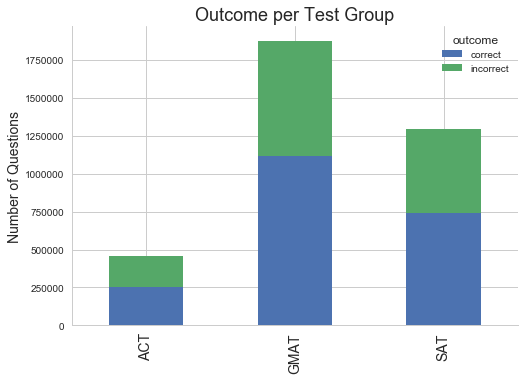

In [43]:
# Get a broad quick view of outcome by group name:
pd.crosstab(index=df.group_name, columns=[df.outcome]).plot(kind='bar', stacked=True)

# Create bar labels:
plt.xticks(np.arange(3), ('ACT', 'GMAT', 'SAT'), fontsize=14)

# Create axis labels and the title:
plt.xlabel('')
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Outcome per Test Group', fontsize=18)

# Minimize the plot frame:
sns.despine()


# Display the plot:
plt.show()

#### Create dataframes for each test group (ACT, GMAT, SAT) and inspect:

#### ACT

In [44]:
# Save and inspect a dataframe of observations for the ACT group only:
act = df[df['group_name'] == 'act']
act.head()

,user_id,round_started_at,answered_at,deactivated_at,round_ended_at,question_id,correct,group_name,track_name,subtrack_name,tag_ids,question_type,game_type,num_players,round_duration,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
2069,130429,2010-10-21 17:16:52,NaT,2010-10-21 17:18:01,2010-10-21 17:18:01,3115,0,act,3,12,"['16', '34', '39', '123', '152', '212', '243']",0,7,1,00:01:09,16,34,39,123,152,212,243,0,0,incorrect
2070,130429,2010-10-21 17:26:30,2010-10-21 17:26:40,2010-10-21 17:27:38,2010-10-21 17:26:40,1530,0,act,0,2,"['65', '172']",0,7,2,00:00:10,65,172,0,0,0,0,0,0,0,incorrect
2071,130429,2010-10-21 17:28:24,2010-10-21 17:28:59,2010-10-21 17:29:02,2010-10-21 17:28:59,3488,0,act,1,6,"['46', '64', '86', '125', '254', '268']",0,7,3,00:00:35,46,64,86,125,254,268,0,0,0,incorrect
2072,130429,2010-10-21 17:29:32,2010-10-21 17:29:48,2010-10-21 17:30:45,2010-10-21 17:29:48,2505,0,act,1,6,"['125', '135', '155', '209']",0,7,4,00:00:16,125,135,155,209,0,0,0,0,0,incorrect
2073,130429,2010-10-21 17:30:59,NaT,2010-10-21 17:32:02,2010-10-21 17:32:02,3945,0,act,1,6,"['21', '64', '81', '112', '125']",0,7,4,00:01:03,21,64,81,112,125,0,0,0,0,incorrect


#### GMAT

In [45]:
# Save and inspect a dataframe of observations for the GMAT group only:
gmat = df[df['group_name'] == 'gmat']
gmat.head()

,user_id,round_started_at,answered_at,deactivated_at,round_ended_at,question_id,correct,group_name,track_name,subtrack_name,tag_ids,question_type,game_type,num_players,round_duration,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
0,85818,2010-08-18 20:17:13,2010-08-18 20:18:18,2010-08-18 20:18:18,2010-08-18 20:18:18,5560,0,gmat,5,14,"['222', '233', '240', '246']",0,7,1,00:01:05,222,233,240,246,0,0,0,0,0,incorrect
1,85818,2010-08-18 20:19:12,2010-08-18 20:20:34,2010-08-18 20:20:34,2010-08-18 20:20:34,4681,1,gmat,5,0,"['24', '49']",0,7,1,00:01:22,24,49,0,0,0,0,0,0,0,correct
2,85818,2010-08-18 20:20:42,2010-08-18 20:21:56,2010-08-18 20:21:56,2010-08-18 20:21:56,1529,1,gmat,5,0,"['31', '49']",0,7,1,00:01:14,31,49,0,0,0,0,0,0,0,correct
3,85818,2010-08-18 20:22:03,2010-08-18 20:23:05,2010-08-18 20:23:05,2010-08-18 20:23:05,2908,1,gmat,5,0,"['31', '49']",0,7,1,00:01:02,31,49,0,0,0,0,0,0,0,correct
4,85818,2010-08-18 20:23:11,2010-08-18 20:26:08,2010-08-18 20:26:08,2010-08-18 20:26:08,1773,1,gmat,5,11,"['183', '194', '207']",0,7,1,00:02:57,183,194,207,0,0,0,0,0,0,correct


#### SAT

In [46]:
# Save and inspect a dataframe of observations for the SAT group only:
sat = df[df['group_name'] == 'sat']
sat.head()

,user_id,round_started_at,answered_at,deactivated_at,round_ended_at,question_id,correct,group_name,track_name,subtrack_name,tag_ids,question_type,game_type,num_players,round_duration,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
2847,10930,2010-02-20 20:07:51,NaT,2010-02-20 20:11:51,2010-02-20 20:11:51,4012,0,sat,7,13,"['223', '231', '245']",0,7,1,00:04:00,223,231,245,0,0,0,0,0,0,incorrect
2848,10930,2010-02-20 20:15:03,NaT,2010-02-20 20:18:21,2010-02-20 20:18:21,2002,0,sat,7,8,"['145', '179', '198']",0,4,2,00:03:18,145,179,198,0,0,0,0,0,0,incorrect
2849,10930,2010-02-20 20:19:57,2010-02-20 20:20:57,2010-02-20 20:20:57,2010-02-20 20:20:57,5875,0,sat,7,8,"['145', '179', '200']",0,4,2,00:01:00,145,179,200,0,0,0,0,0,0,incorrect
2850,10930,2010-02-20 20:21:32,2010-02-20 20:22:28,2010-02-20 20:22:28,2010-02-20 20:22:28,4704,1,sat,7,8,"['145', '179', '200']",0,4,2,00:00:56,145,179,200,0,0,0,0,0,0,correct
2851,10930,2010-02-20 20:22:38,2010-02-20 20:22:53,2010-02-20 20:22:53,2010-02-20 20:22:53,1426,0,sat,7,8,"['145', '179', '190']",0,4,2,00:00:15,145,179,190,0,0,0,0,0,0,incorrect


#### Target (Correct) and Round Duration Statistics:

#### ACT

In [47]:
# Display statistics for numerical variables:
act.describe()

,user_id,question_id,correct,round_duration
count,459909.000000,459909.000000,459909.000000,459909
mean,90206.018569,3039.252443,0.544616,0 days 00:00:52.646110
std,51911.847335,1710.504275,0.498006,0 days 00:00:48.287867
min,6.000000,8.000000,0.000000,0 days 00:00:05
25%,45663.000000,1620.000000,0.000000,0 days 00:00:21
50%,91356.000000,2931.000000,1.000000,0 days 00:00:37
75%,134480.000000,4520.000000,1.000000,0 days 00:01:07
max,179058.000000,6041.000000,1.000000,0 days 00:09:58


#### GMAT

In [48]:
# Display statistics for numerical variables:
gmat.describe()

,user_id,question_id,correct,round_duration
count,1.878221e+06,1.878221e+06,1.878221e+06,1878221
mean,9.044053e+04,2.977436e+03,5.941729e-01,0 days 00:01:18.704098
std,5.123745e+04,1.731675e+03,4.910515e-01,0 days 00:00:52.920114
min,2.200000e+01,1.000000e+00,0.000000e+00,0 days 00:00:05
25%,4.713900e+04,1.468000e+03,0.000000e+00,0 days 00:00:40
50%,9.106500e+04,2.991000e+03,1.000000e+00,0 days 00:01:09
75%,1.342750e+05,4.411000e+03,1.000000e+00,0 days 00:01:49
max,1.790860e+05,6.043000e+03,1.000000e+00,0 days 00:10:00


#### SAT

In [49]:
# Display statistics for numerical variables:
sat.describe()

,user_id,question_id,correct,round_duration
count,1.293473e+06,1.293473e+06,1.293473e+06,1293473
mean,8.892155e+04,3.048733e+03,5.747519e-01,0 days 00:00:59.584153
std,5.179159e+04,1.729178e+03,4.943808e-01,0 days 00:00:55.099650
min,5.000000e+00,0.000000e+00,0.000000e+00,0 days 00:00:05
25%,4.214000e+04,1.548000e+03,0.000000e+00,0 days 00:00:22
50%,9.094900e+04,3.098000e+03,1.000000e+00,0 days 00:00:41
75%,1.332160e+05,4.539000e+03,1.000000e+00,0 days 00:01:17
max,1.790730e+05,6.045000e+03,1.000000e+00,0 days 00:10:00


#### Categorical Variable Statistics:

#### ALL OBSERVATIONS

In [50]:
# Filter columns for category datatype and display the statistics:
categorical = df.dtypes[df.dtypes == 'category'].index
df[categorical].describe()

,track_name,subtrack_name,question_type,game_type,num_players,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
count,3631603,3631603,3631603,3631603,3631603,3631603,3631603,3631603,3631603,3631603,3631603,3631603,3631603,3631603,3631603
unique,9,16,2,11,32,133,207,214,182,129,78,43,17,4,2
top,5,9,0,7,1,4,49,0,0,0,0,0,0,0,correct
freq,1014692,528912,3498729,2231401,2274639,396334,237392,638919,1499558,2528041,3241609,3514898,3608572,3628596,2109888


#### ACT

In [51]:
# Filter columns for category datatype and display the statistics:
categorical = act.dtypes[act.dtypes == 'category'].index
act[categorical].describe()

,track_name,subtrack_name,question_type,game_type,num_players,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
count,459909,459909,459909,459909,459909,459909,459909,459909,459909,459909,459909,459909,459909,459909,459909
unique,4,4,1,10,25,48,84,90,84,60,35,17,7,2,2
top,0,2,0,7,1,65,65,125,0,0,0,0,0,0,correct
freq,205713,205713,459909,350063,336626,97721,73562,43464,144373,299409,371074,431435,452271,459024,250474


#### GMAT

In [52]:
# Filter columns for category datatype and display the statistics:
categorical = gmat.dtypes[gmat.dtypes == 'category'].index
gmat[categorical].describe()

,track_name,subtrack_name,question_type,game_type,num_players,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
count,1878221,1878221,1878221,1878221,1878221,1878221,1878221,1878221,1878221,1878221,1878221,1878221,1878221,1878221,1878221
unique,2,5,1,11,21,56,70,68,54,39,26,15,8,2,2
top,5,9,0,7,1,4,49,0,0,0,0,0,0,0,correct
freq,1014692,528912,1878221,852725,1239540,396334,237392,450081,765391,1293482,1704853,1837564,1870147,1877356,1115988


#### SAT

In [53]:
# Filter columns for category datatype and display the statistics:
categorical = sat.dtypes[sat.dtypes == 'category'].index
sat[categorical].describe()

,track_name,subtrack_name,question_type,game_type,num_players,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,outcome
count,1293473,1293473,1293473,1293473,1293473,1293473,1293473,1293473,1293473,1293473,1293473,1293473,1293473,1293473,1293473
unique,3,7,2,10,26,35,65,79,67,47,25,17,5,3,2
top,8,7,0,7,1,5,131,0,0,0,0,0,0,0,correct
freq,496700,311343,1160599,1028613,698473,209456,114680,162382,589794,935150,1165682,1245899,1286154,1292216,743426


#### Investigate overlap of variables between test groups:

#### USERS

In [54]:
act_unique_users = set(act.user_id)

print('Number of Users Preparing for ACT:', len(act_unique_users))

gmat_unique_users = set(gmat.user_id)

print('Number of Users Preparing for GMAT:', len(gmat_unique_users))

sat_unique_users = set(sat.user_id)

print('Number of Users Preparing for SAT:', len(sat_unique_users))

Number of Users Preparing for ACT: 5135
Number of Users Preparing for GMAT: 8543
Number of Users Preparing for SAT: 7899


In [55]:
print('Number of Users Preparing for All Test Groups:', len(act_unique_users.intersection(gmat_unique_users, sat_unique_users)))
print('Number of Users Preparing for ACT & GMAT:', len(act_unique_users.intersection(gmat_unique_users)))
print('Number of Users Preparing for ACT & SAT:', len(act_unique_users.intersection(sat_unique_users)))
print('Number of Users Preparing for GMAT & SAT:', len(gmat_unique_users.intersection(sat_unique_users)))

Number of Users Preparing for All Test Groups: 185
Number of Users Preparing for ACT & GMAT: 238
Number of Users Preparing for ACT & SAT: 1040
Number of Users Preparing for GMAT & SAT: 474


#### UNIQUE QUESTIONS

In [56]:
act_unique_questions = set(act.question_id)

print('Number of Unique Questions in the ACT Group:', len(act_unique_questions))

gmat_unique_questions = set(gmat.question_id)

print('Number of Unique Questions in the GMAT Group:', len(gmat_unique_questions))

sat_unique_questions = set(sat.question_id)

print('Number of Unique Questions in the SAT Group:', len(sat_unique_questions))

Number of Unique Questions in the ACT Group: 2092
Number of Unique Questions in the GMAT Group: 2203
Number of Unique Questions in the SAT Group: 1748


In [57]:
print('Number of Unique Questions in All Test Groups:', len(act_unique_questions.intersection(gmat_unique_questions, sat_unique_questions)))
print('Number of Unique Questions in the ACT & GMAT Test Groups:', len(act_unique_questions.intersection(gmat_unique_questions)))
print('Number of Unique Questions in the ACT & SAT Test Groups:', len(act_unique_questions.intersection(sat_unique_questions)))
print('Number of Unique Questions in the GMAT & SAT Test Groups:', len(gmat_unique_questions.intersection(sat_unique_questions)))

Number of Unique Questions in All Test Groups: 0
Number of Unique Questions in the ACT & GMAT Test Groups: 0
Number of Unique Questions in the ACT & SAT Test Groups: 0
Number of Unique Questions in the GMAT & SAT Test Groups: 0


Unique values for each group name: 2092 + 2203 + 1748 = 6043

#### TAGS

In [58]:
tag_0 = set(df.tag_0)
tag_1 = set(df.tag_1)
tag_2 = set(df.tag_2)
tag_3 = set(df.tag_3)
tag_4 = set(df.tag_4)
tag_5 = set(df.tag_5)
tag_6 = set(df.tag_6)
tag_7 = set(df.tag_7)
tag_8 = set(df.tag_8)

df_unique_tags = tag_0.union(tag_1, tag_2, tag_3, tag_4, tag_5, tag_6, tag_7, tag_8)
print('Total number of unique tags:', len(df_unique_tags))

Total number of unique tags: 281


This also matches the number of tag labels in the `labels.csv` file provided with the dataset.

In [59]:
act_tag_0 = set(act.tag_0)
act_tag_1 = set(act.tag_1)
act_tag_2 = set(act.tag_2)
act_tag_3 = set(act.tag_3)
act_tag_4 = set(act.tag_4)
act_tag_5 = set(act.tag_5)
act_tag_6 = set(act.tag_6)
act_tag_7 = set(act.tag_7)
act_tag_8 = set(act.tag_8)

act_unique_tags = act_tag_0.union(act_tag_1, act_tag_2, act_tag_3, act_tag_4, act_tag_5, act_tag_6, act_tag_7, act_tag_8)
print('Number of unique tags in the ACT group:', len(act_unique_tags))

Number of unique tags in the ACT group: 115


In [60]:
gmat_tag_0 = set(gmat.tag_0)
gmat_tag_1 = set(gmat.tag_1)
gmat_tag_2 = set(gmat.tag_2)
gmat_tag_3 = set(gmat.tag_3)
gmat_tag_4 = set(gmat.tag_4)
gmat_tag_5 = set(gmat.tag_5)
gmat_tag_6 = set(gmat.tag_6)
gmat_tag_7 = set(gmat.tag_7)
gmat_tag_8 = set(gmat.tag_8)

gmat_unique_tags = gmat_tag_0.union(gmat_tag_1, gmat_tag_2, gmat_tag_3, gmat_tag_4, gmat_tag_5, gmat_tag_6, gmat_tag_7, gmat_tag_8)
print('Number of unique tags in the GMAT group:', len(gmat_unique_tags))

Number of unique tags in the GMAT group: 86


In [61]:
sat_tag_0 = set(sat.tag_0)
sat_tag_1 = set(sat.tag_1)
sat_tag_2 = set(sat.tag_2)
sat_tag_3 = set(sat.tag_3)
sat_tag_4 = set(sat.tag_4)
sat_tag_5 = set(sat.tag_5)
sat_tag_6 = set(sat.tag_6)
sat_tag_7 = set(sat.tag_7)
sat_tag_8 = set(sat.tag_8)

sat_unique_tags = sat_tag_0.union(sat_tag_1, sat_tag_2, sat_tag_3, sat_tag_4, sat_tag_5, sat_tag_6, sat_tag_7, sat_tag_8)
print('Number of unique tags in the SAT group:', len(sat_unique_tags))

Number of unique tags in the SAT group: 108


In [62]:
print('Tags overlapping all groups:', act_unique_tags.intersection(gmat_unique_tags, sat_unique_tags))
print('Tags overlapping ACT and GMAT:', act_unique_tags.intersection(gmat_unique_tags))
print('Tags overlapping ACT and SAT:', act_unique_tags.intersection(sat_unique_tags))
print('Tags overlapping GMAT and SAT', gmat_unique_tags.intersection(sat_unique_tags))

Tags overlapping all groups: {0, 249, 279}
Tags overlapping ACT and GMAT: {0, 135, 81, 82, 20, 148, 279, 249}
Tags overlapping ACT and SAT: {0, 130, 103, 167, 169, 44, 172, 204, 143, 144, 279, 280, 249}
Tags overlapping GMAT and SAT {0, 1, 193, 71, 108, 110, 175, 279, 249, 250}


<a href='#top' id='act'>back to menu</a>

### ACT Data

* Number of Questions per User
* Determine the ratio of correct answers and the average of round durations for each user in the clean dataset.
* Distribution of User Scores (Ratios of Correct Answers)
* Distribution of User Round Duration Averages
* Is there a correlation between user scores and round duration averages?
* Is there a correlation between user scores and number of questions attempted?
* Distribution of correct/incorrect observations for each track, subtrack.

In [63]:
# Confirm the count of users:
print( ("Number of ACT Users: "), len(act.user_id.value_counts()) )

Number of ACT Users:  5135


#### ACT Data - Number of Questions per User:

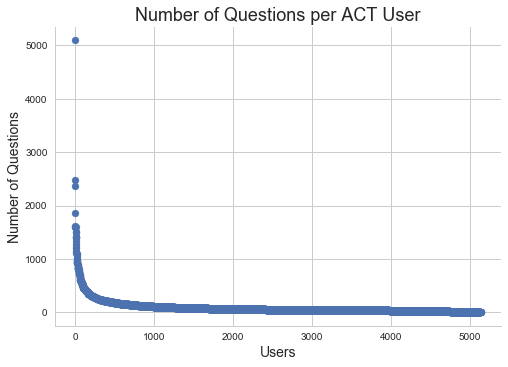

In [64]:
# Count and save the number of questions per user:
questions_per_user = act.user_id.value_counts()

# Convert to a dataframe, reset the index for future plotting and drop resulting extra column:
questions_per_user = questions_per_user.to_frame('question_count').reset_index().drop('index', axis='columns')

# Create questions_per_user scatter plot:
plt.scatter(questions_per_user.index, questions_per_user.question_count)

# Create the labels and title of the plot:
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Number of Questions per ACT User', fontsize=18)

# Minimize the plot frame:
sns.despine()

plt.show()

#### ACT Data - Determine the ratio of correct answers and the average of round durations for each user in the clean dataset:

In [65]:
# Build a dataframe of user data for ACT:
act_users = user_data(act)

# Inspect:
print(act_users.info())
act_users.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5135 entries, 6 to 179058
Data columns (total 5 columns):
num_correct               5135 non-null int64
num_incorrect             5135 non-null int64
num_questions             5135 non-null int64
correct_ratio             5135 non-null float64
round_duration_average    5135 non-null timedelta64[ns]
dtypes: float64(1), int64(3), timedelta64[ns](1)
memory usage: 240.7 KB
None


,num_correct,num_incorrect,num_questions,correct_ratio,round_duration_average
user_id,,,,,
6,19,21,40,0.475000,00:00:55.950000
77,27,13,40,0.675000,00:00:32.200000
87,10,40,50,0.200000,00:00:48.760000
103,185,279,464,0.398707,00:01:40.254310
143,24,20,44,0.545455,00:01:21.500000


In [66]:
act_users.describe()

,num_correct,num_incorrect,num_questions,correct_ratio,round_duration_average
count,5135.000000,5135.000000,5135.000000,5135.000000,5135
mean,48.777799,40.785784,89.563583,0.507462,0 days 00:00:52.594928
std,94.484418,69.838991,157.056653,0.186321,0 days 00:00:23.030057
min,0.000000,0.000000,1.000000,0.000000,0 days 00:00:05
25%,16.000000,15.000000,34.000000,0.393939,0 days 00:00:36.822390
50%,25.000000,24.000000,49.000000,0.517986,0 days 00:00:49.189944
75%,48.000000,41.000000,88.000000,0.636364,0 days 00:01:03.465179
max,2877.000000,2217.000000,5094.000000,1.000000,0 days 00:04:00


#### ACT Data - Distribution of User Scores (Ratios of Correct Answers)

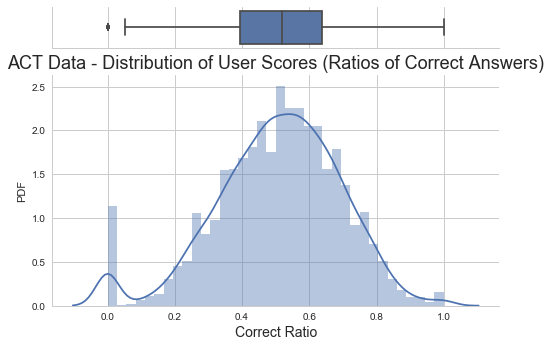

In [67]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for correct_ratio:
sns.boxplot(act_users.correct_ratio, ax=boxplot)

# Add histogram for correct_ratio:
sns.distplot(act_users.correct_ratio, ax=histogram)

# Label axes and add title:
plt.xlabel('Correct Ratio', fontsize=14)
plt.ylabel('PDF')
plt.title('ACT Data - Distribution of User Scores (Ratios of Correct Answers)', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Minimize the plot frame:
sns.despine()

# Display the plots:
plt.show()

#### ACT Data - Distribution of User Round Duration Averages

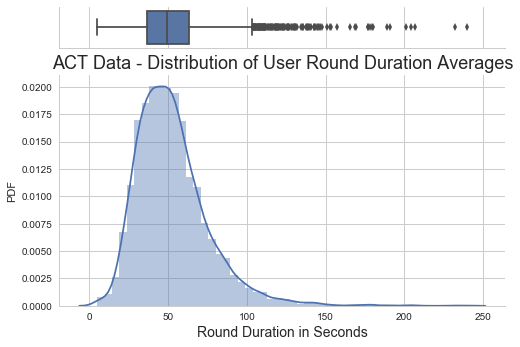

In [68]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for round_duration_average:
sns.boxplot(act_users['round_duration_average']/np.timedelta64(1, 's'), ax=boxplot)

# Add histogram for round_duration_average:
sns.distplot(act_users['round_duration_average']/np.timedelta64(1, 's'), ax=histogram)

# Label axes and add title:
plt.xlabel('Round Duration in Seconds', fontsize=14)
plt.ylabel('PDF')
plt.title('ACT Data - Distribution of User Round Duration Averages', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Minimize the plot frame:
sns.despine()

# Display the plots:
plt.show()

#### ACT Data - Is there a correlation between user scores and round duration averages?

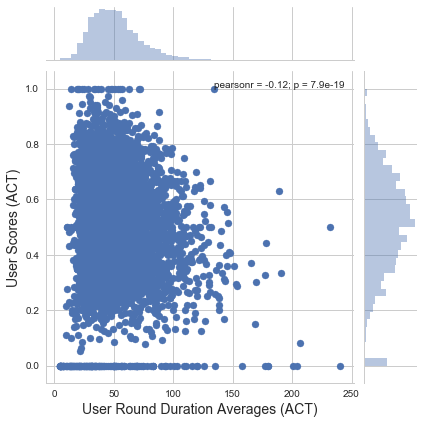

In [69]:
# Quick view of possible relationship between correct ration and round duration:
fig = sns.jointplot(act_users['round_duration_average']/np.timedelta64(1, 's'), act_users.correct_ratio)

# Label axes:
fig.set_axis_labels('User Round Duration Averages (ACT)', 'User Scores (ACT)', fontsize=14)

# Display the plot:
plt.show()

#### ACT Data - Is there a correlation between user scores and number of questions attempted?

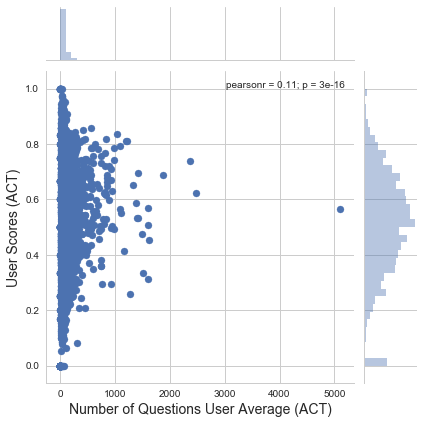

In [70]:
# Quick view of possible relationship between correct ration and round duration:
fig = sns.jointplot(act_users.num_questions, act_users.correct_ratio)

# Label axes:
fig.set_axis_labels('Number of Questions User Average (ACT)', 'User Scores (ACT)', fontsize=14)

# Display the plot:
plt.show()

#### ACT Data - Distribution of correct/incorrect observations for each track, subtrack.

In [71]:
# Get a view of tiered variables related to the act group:
act_tracks = pd.crosstab(index=act.outcome,columns=[act.track_name, act.subtrack_name])
act_tracks

track_name,0,1,2,3
subtrack_name,2,6,10,12
outcome,,,,
correct,121374,72832,24922,31346
incorrect,84339,73169,22874,29053


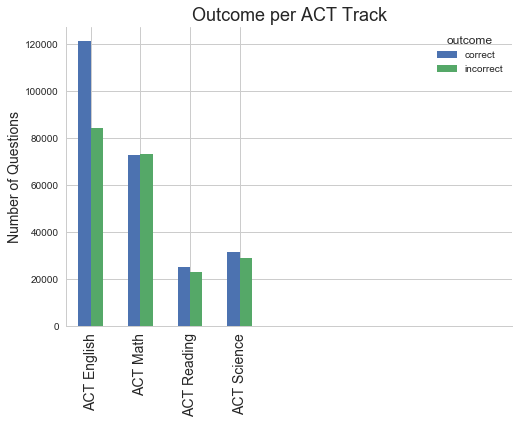

In [72]:
# Create stacked bar plot for track_name distribution by 'outcome':
pd.crosstab(index=act.track_name, columns=[act.outcome]).plot(kind='bar')

# Create bar labels:
tracks = ('ACT English', 'ACT Math', 'ACT Reading', 'ACT Science')
plt.xticks(np.arange(len(tracks)), tracks, fontsize=14)

# Create axis labels and the title:
plt.xlabel('')
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Outcome per ACT Track', fontsize=18)

# Minimize the plot frame:
sns.despine()

# Display the plot:
plt.show()

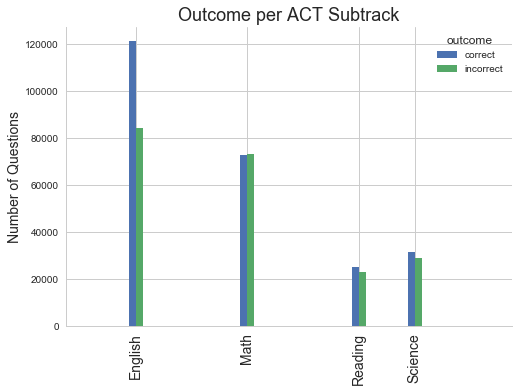

In [73]:
# Create stacked bar plot for track_name distribution by 'outcome':
pd.crosstab(index=act.subtrack_name, columns=[act.outcome]).plot(kind='bar')

# Create bar labels:
subtracks = ('English', 'Math', 'Reading', 'Science')
plt.xticks((2,6,10,12), subtracks, fontsize=14)

# Create axis labels and the title:
plt.xlabel('')
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Outcome per ACT Subtrack', fontsize=18)

# Minimize the plot frame:
sns.despine()

# Display the plot:
plt.show()

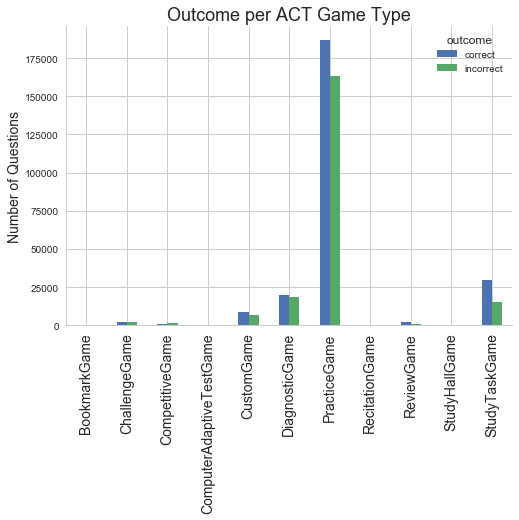

In [74]:
# Create stacked bar plot for track_name distribution by 'outcome':
pd.crosstab(index=act.game_type, columns=[act.outcome]).plot(kind='bar')

# Create bar labels:
game_types = ('BookmarkGame', 'ChallengeGame', 'CompetitiveGame', 'ComputerAdaptiveTestGame', 'CustomGame', 'DiagnosticGame', 'PracticeGame', 'RecitationGame', 'ReviewGame', 'StudyHallGame', 'StudyTaskGame')
plt.xticks(np.arange(11), game_types, fontsize=14)

# Create axis labels and the title:
plt.xlabel('')
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Outcome per ACT Game Type', fontsize=18)

# Minimize the plot frame:
sns.despine()

# Display the plot:
plt.show()

<a href='#top' id='gmat'>back to menu</a>

### GMAT Data

* Number of Questions per User
* Determine the ratio of correct answers and the average of round durations for each user in the clean dataset.
* Distribution of User Scores (Ratios of Correct Answers)
* Distribution of User Round Duration Averages
* Is there a correlation between user scores and round duration averages?
* Is there a correlation between user scores and number of questions attempted?
* Distribution of correct/incorrect observations for each track, subtrack.

In [75]:
# Confirm the count of users:
print( ("Number of GMAT Users: "), len(gmat.user_id.value_counts()) )

Number of GMAT Users:  8543


#### GMAT Data - Number of Questions per User:

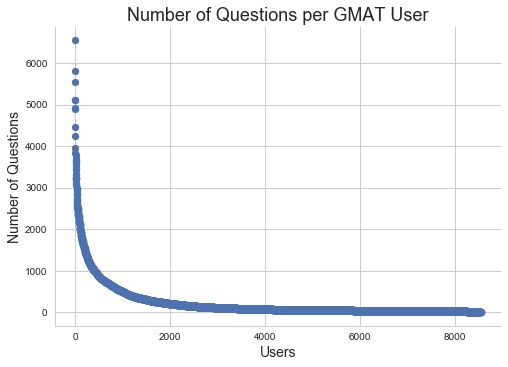

In [76]:
# Count and save the number of questions per user:
questions_per_user = gmat.user_id.value_counts()

# Convert to a dataframe, reset the index for future plotting and drop resulting extra column:
questions_per_user = questions_per_user.to_frame('question_count').reset_index().drop('index', axis='columns')

# Create questions_per_user scatter plot:
plt.scatter(questions_per_user.index, questions_per_user.question_count)

# Create the labels and title of the plot:
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Number of Questions per GMAT User', fontsize=18)

# Minimize the plot frame:
sns.despine()

plt.show()

#### GMAT Data - Determine the ratio of correct answers and the average of round durations for each user in the clean dataset:

In [77]:
# Build a dataframe of user data for GMAT:
gmat_users = user_data(gmat)

# Inspect:
gmat_users.head()

,num_correct,num_incorrect,num_questions,correct_ratio,round_duration_average
user_id,,,,,
22,39,10,49,0.795918,00:01:14.938775
58,37,11,48,0.770833,00:01:09.958333
86,138,12,150,0.920000,00:01:05.773333
97,1577,747,2324,0.678571,00:01:14.537005
103,7,13,20,0.350000,00:01:47.100000


#### GMAT Data - Distribution of User Scores (Ratios of Correct Answers)

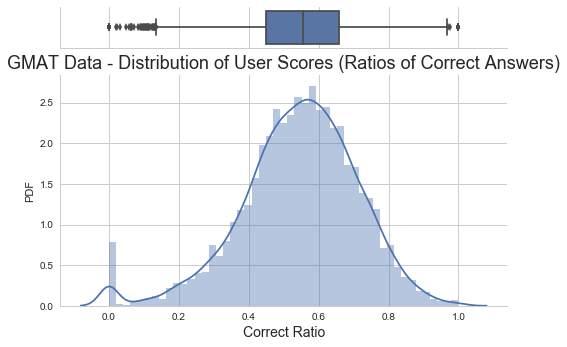

In [78]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for correct_ratio:
sns.boxplot(gmat_users.correct_ratio, ax=boxplot)

# Add histogram for correct_ratio:
sns.distplot(gmat_users.correct_ratio, ax=histogram)

# Label axes and add title:
plt.xlabel('Correct Ratio', fontsize=14)
plt.ylabel('PDF')
plt.title('GMAT Data - Distribution of User Scores (Ratios of Correct Answers)', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Minimize the plot frame:
sns.despine()

# Display the plots:
plt.show()

#### GMAT Data - Distribution of User Round Duration Averages

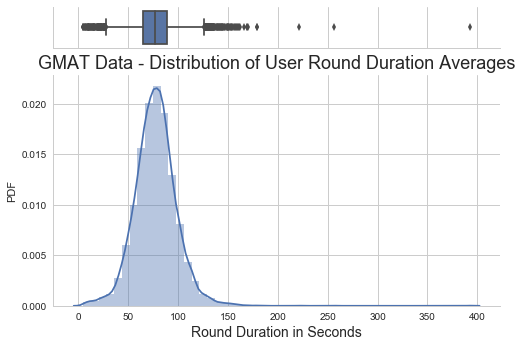

In [79]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for round_duration_average:
sns.boxplot(gmat_users['round_duration_average']/np.timedelta64(1, 's'), ax=boxplot)

# Add histogram for round_duration_average:
sns.distplot(gmat_users['round_duration_average']/np.timedelta64(1, 's'), ax=histogram)

# Label axes and add title:
plt.xlabel('Round Duration in Seconds', fontsize=14)
plt.ylabel('PDF')
plt.title('GMAT Data - Distribution of User Round Duration Averages', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Minimize the plot frame:
sns.despine()

# Display the plots:
plt.show()

#### GMAT Data - Is there a correlation between user scores and round duration averages?

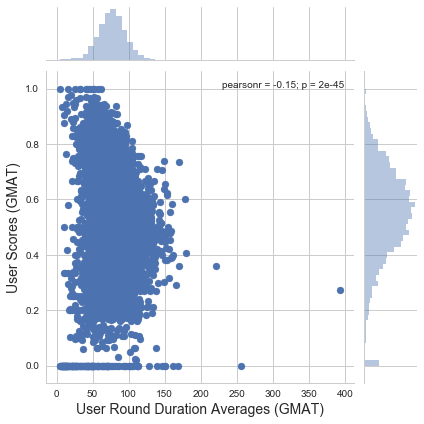

In [80]:
# Quick view of possible relationship between correct ration and round duration:
fig = sns.jointplot(gmat_users['round_duration_average']/np.timedelta64(1, 's'), gmat_users.correct_ratio)

# Label axes:
fig.set_axis_labels('User Round Duration Averages (GMAT)', 'User Scores (GMAT)', fontsize=14)

# Display the plot:
plt.show()

#### GMAT Data - Is there a correlation between user scores and number of questions attempted?

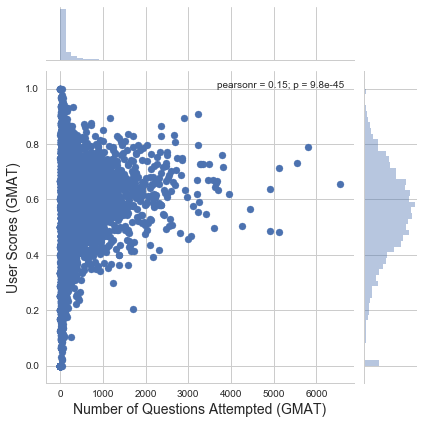

In [81]:
# Quick view of possible relationship between correct ration and round duration:
fig = sns.jointplot(gmat_users.num_questions, gmat_users.correct_ratio)

# Label axes:
fig.set_axis_labels('Number of Questions Attempted (GMAT)', 'User Scores (GMAT)', fontsize=14)

# Display the plot:
plt.show()

#### GMAT Data - Distribution of correct/incorrect observations for each track, subtrack.

In [82]:
# Get a view of tiered variables related to the gmat group:
gmat_tracks = pd.crosstab(index=gmat.correct,columns=[gmat.track_name, gmat.subtrack_name])
gmat_tracks

track_name          4               5                
subtrack_name      1       9       0       11      14
correct                                              
0              142237  223929  119933  100523  175611
1              192380  304983  182598  131172  304855

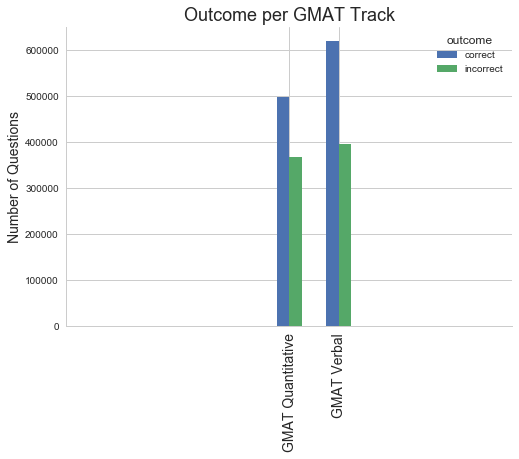

In [83]:
# Create stacked bar plot for track_name distribution by 'outcome':
pd.crosstab(index=gmat.track_name, columns=[gmat.outcome]).plot(kind='bar')

# Create bar labels:
tracks = ('GMAT Quantitative', 'GMAT Verbal')
plt.xticks((4,5), tracks, fontsize=14)

# Create axis labels and the title:
plt.xlabel('')
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Outcome per GMAT Track', fontsize=18)

# Minimize the plot frame:
sns.despine()

# Display the plot:
plt.show()

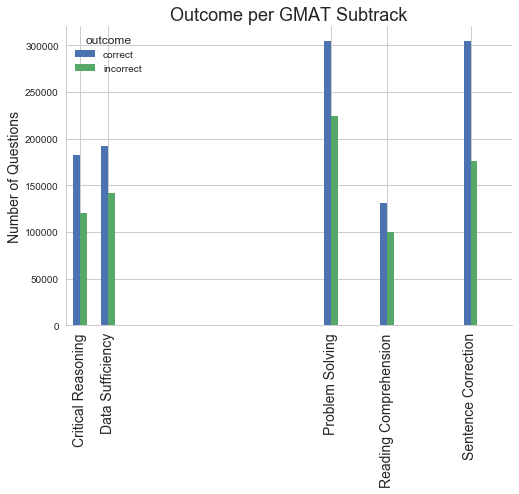

In [84]:
# Create stacked bar plot for track_name distribution by 'outcome':
pd.crosstab(index=gmat.subtrack_name, columns=[gmat.outcome]).plot(kind='bar')

# Create bar labels:
subtracks = ('Data Sufficiency', 'Problem Solving', 'Critical Reasoning', 'Reading Comprehension', 'Sentence Correction')
plt.xticks((1,9,0,11,14), subtracks, fontsize=14)

# Create axis labels and the title:
plt.xlabel('')
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Outcome per GMAT Subtrack', fontsize=18)

# Minimize the plot frame:
sns.despine()

# Display the plot:
plt.show()

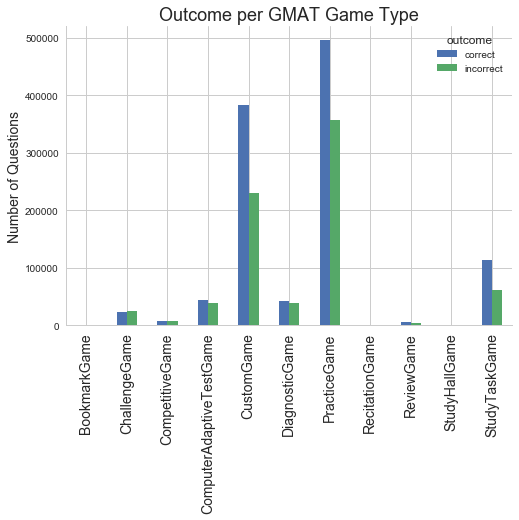

In [85]:
# Create stacked bar plot for track_name distribution by 'outcome':
pd.crosstab(index=gmat.game_type, columns=[gmat.outcome]).plot(kind='bar')

# Create bar labels:
game_types = ('BookmarkGame', 'ChallengeGame', 'CompetitiveGame', 'ComputerAdaptiveTestGame', 'CustomGame', 'DiagnosticGame', 'PracticeGame', 'RecitationGame', 'ReviewGame', 'StudyHallGame', 'StudyTaskGame')
plt.xticks(np.arange(11), game_types, fontsize=14)

# Create axis labels and the title:
plt.xlabel('')
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Outcome per GMAT Game Type', fontsize=18)

# Minimize the plot frame:
sns.despine()

# Display the plot:
plt.show()

<a href='#top' id='sat'>back to menu</a>

### SAT Data

* Number of Questions per User
* Determine the ratio of correct answers and the average of round durations for each user in the clean dataset.
* Distribution of User Scores (Ratios of Correct Answers)
* Distribution of User Round Duration Averages
* Is there a correlation between user scores and round duration averages?
* Is there a correlation between user scores and number of questions attempted?
* Distribution of correct/incorrect observations for each track, subtrack.

In [86]:
# Confirm the count of users:
print( ("Number of SAT Users: "), len(sat.user_id.value_counts()) )

Number of SAT Users:  7899


#### SAT Data - Number of Questions per User:

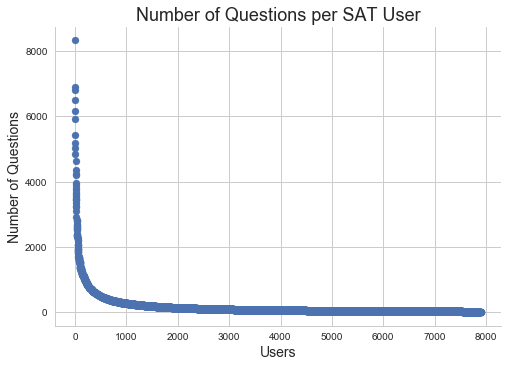

In [87]:
# Count and save the number of questions per user:
questions_per_user = sat.user_id.value_counts()

# Convert to a dataframe, reset the index for future plotting and drop resulting extra column:
questions_per_user = questions_per_user.to_frame('question_count').reset_index().drop('index', axis='columns')

# Create questions_per_user scatter plot:
plt.scatter(questions_per_user.index, questions_per_user.question_count)

# Create the labels and title of the plot:
plt.xlabel('Users', fontsize=14)
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Number of Questions per SAT User', fontsize=18)

# Minimize the plot frame:
sns.despine()

plt.show()

#### SAT Data - Determine the ratio of correct answers and the average of round durations for each user in the clean dataset:

In [88]:
# Build a dataframe of user data for SAT:
sat_users = user_data(sat)

# Inspect:
sat_users.head()

,num_correct,num_incorrect,num_questions,correct_ratio,round_duration_average
user_id,,,,,
5,29,32,61,0.475410,00:00:39.295081
76,56,43,99,0.565657,00:00:48.818181
102,101,147,248,0.407258,00:00:55.479838
103,596,1090,1686,0.353499,00:01:46.937722
142,41,47,88,0.465909,00:01:12.318181


#### SAT Data - Distribution of User Scores (Ratios of Correct Answers)

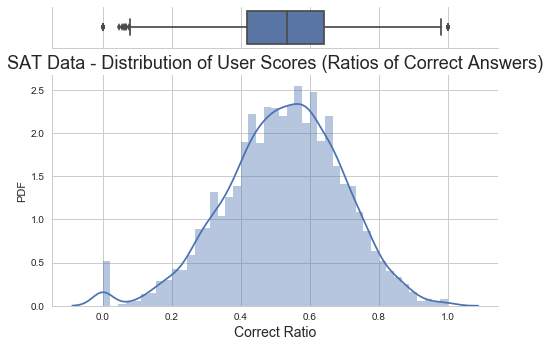

In [89]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for correct_ratio:
sns.boxplot(sat_users.correct_ratio, ax=boxplot)

# Add histogram for correct_ratio:
sns.distplot(sat_users.correct_ratio, ax=histogram)

# Label axes and add title:
plt.xlabel('Correct Ratio', fontsize=14)
plt.ylabel('PDF')
plt.title('SAT Data - Distribution of User Scores (Ratios of Correct Answers)', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Minimize the plot frame:
sns.despine()

# Display the plots:
plt.show()

#### SAT Data - Distribution of User Round Duration Averages

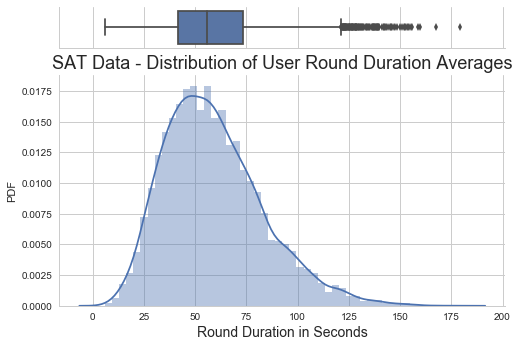

In [90]:
# Create a figure with two plots:
fig, (boxplot, histogram) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add boxplot for round_duration_average:
sns.boxplot(sat_users['round_duration_average']/np.timedelta64(1, 's'), ax=boxplot)

# Add histogram for round_duration_average:
sns.distplot(sat_users['round_duration_average']/np.timedelta64(1, 's'), ax=histogram)

# Label axes and add title:
plt.xlabel('Round Duration in Seconds', fontsize=14)
plt.ylabel('PDF')
plt.title('SAT Data - Distribution of User Round Duration Averages', fontsize=18)

# Remove x-axis label for the boxplot:
boxplot.set(xlabel='')

# Minimize the plot frame:
sns.despine()

# Display the plots:
plt.show()

#### SAT Data - Is there a correlation between user scores and round duration averages?

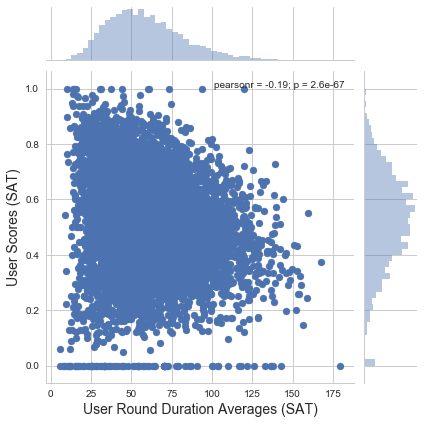

In [91]:
# Quick view of possible relationship between correct ration and round duration:
fig = sns.jointplot(sat_users['round_duration_average']/np.timedelta64(1, 's'), sat_users.correct_ratio)

# Label axes:
fig.set_axis_labels('User Round Duration Averages (SAT)', 'User Scores (SAT)', fontsize=14)

# Display the plot:
plt.show()

#### SAT Data - Is there a correlation between user scores and number of questions attempted?

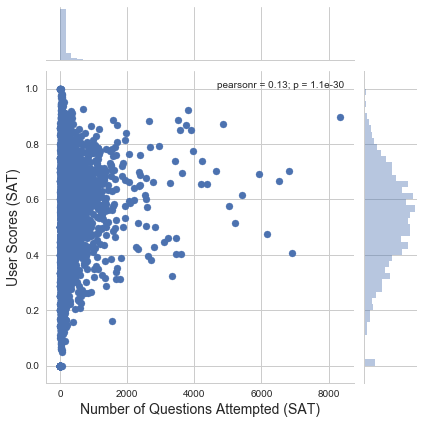

In [92]:
# Quick view of possible relationship between correct ration and round duration:
fig = sns.jointplot(sat_users.num_questions, sat_users.correct_ratio)

# Label axes:
fig.set_axis_labels('Number of Questions Attempted (SAT)', 'User Scores (SAT)', fontsize=14)

# Display the plot:
plt.show()

#### SAT Data - Distribution of correct/incorrect observations for each track, subtrack.

In [93]:
# Get a view of tiered variables related to the sat group:
sat_tracks = pd.crosstab(index=sat.correct,columns=[sat.track_name, sat.subtrack_name])
sat_tracks

track_name          6             7               8               
subtrack_name      7      15     8       13      3      4       5 
correct                                                           
0              124724  69091  67887   80867   83338  32487   91653
1              186619  63783  77460  126342  114012  36493  138717

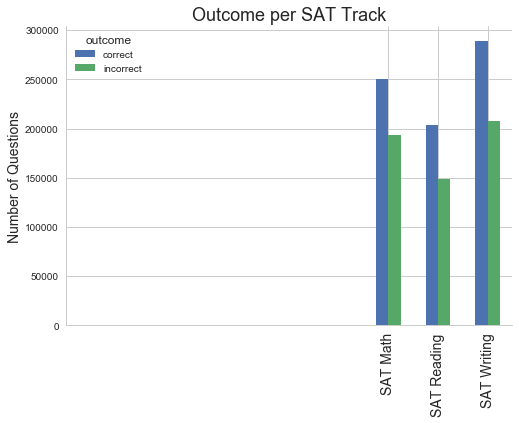

In [94]:
# Create stacked bar plot for track_name distribution by 'outcome':
pd.crosstab(index=sat.track_name, columns=[sat.outcome]).plot(kind='bar')

# Create bar labels:
tracks = ('SAT Math', 'SAT Reading', 'SAT Writing')
plt.xticks((6,7,8), tracks, fontsize=14)

# Create axis labels and the title:
plt.xlabel('')
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Outcome per SAT Track', fontsize=18)

# Minimize the plot frame:
sns.despine()

# Display the plot:
plt.show()

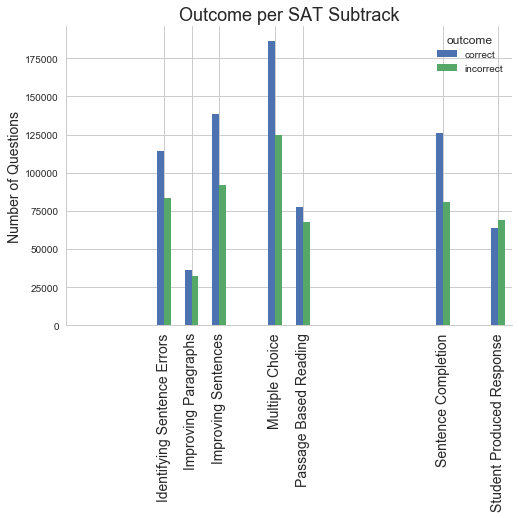

In [95]:
# Create stacked bar plot for track_name distribution by 'outcome':
pd.crosstab(index=sat.subtrack_name, columns=[sat.outcome]).plot(kind='bar')

# Create bar labels:
subtracks = ('Multiple Choice', 'Student Produced Response', 'Passage Based Reading', 'Sentence Completion', 'Identifying Sentence Errors', 'Improving Paragraphs', 'Improving Sentences')
plt.xticks((7,15,8,13,3,4,5), subtracks, fontsize=14)

# Create axis labels and the title:
plt.xlabel('')
plt.ylabel('Number of Questions', fontsize=14)
plt.title('Outcome per SAT Subtrack', fontsize=18)

# Minimize the plot frame:
sns.despine()

# Display the plot:
plt.show()

<a href='#top' id='stats'>back to menu</a>

### Statistical Analysis

In [96]:
?stats.chi2_contingency

In [97]:
def chi_square_independence(feature_1, feature_2):
    
    # Subtrack and Game Type:
    observed = pd.crosstab(df[feature_1], df[feature_2])

    # Test the independence of different categories:
    chi2, p, dof, expected = stats.chi2_contingency(observed=observed)
    
    # Get the critical value for 95% confidence:
    chi_critical = stats.chi2.ppf(q=0.95, df=dof)

    print(feature_1, '|', feature_2, '\ncritical-value:', chi_critical, '\nchi2-statistic:', chi2, '\np-value:', p, '\n')


In [98]:
categories = [
    'user_id',
    'question_id',
    'group_name', 
    'track_name', 
    'subtrack_name', 
    'question_type', 
    'game_type', 
    'num_players'
]

In [99]:
import itertools
test_combinations = list(itertools.combinations(categories, 2))
test_combinations

[('user_id', 'question_id'),
 ('user_id', 'group_name'),
 ('user_id', 'track_name'),
 ('user_id', 'subtrack_name'),
 ('user_id', 'question_type'),
 ('user_id', 'game_type'),
 ('user_id', 'num_players'),
 ('question_id', 'group_name'),
 ('question_id', 'track_name'),
 ('question_id', 'subtrack_name'),
 ('question_id', 'question_type'),
 ('question_id', 'game_type'),
 ('question_id', 'num_players'),
 ('group_name', 'track_name'),
 ('group_name', 'subtrack_name'),
 ('group_name', 'question_type'),
 ('group_name', 'game_type'),
 ('group_name', 'num_players'),
 ('track_name', 'subtrack_name'),
 ('track_name', 'question_type'),
 ('track_name', 'game_type'),
 ('track_name', 'num_players'),
 ('subtrack_name', 'question_type'),
 ('subtrack_name', 'game_type'),
 ('subtrack_name', 'num_players'),
 ('question_type', 'game_type'),
 ('question_type', 'num_players'),
 ('game_type', 'num_players')]

In [100]:
for i, combo in enumerate(test_combinations):
    chi_square_independence(test_combinations[i][0], test_combinations[i][1])

user_id | question_id 
critical-value: 120919955.884 
chi2-statistic: 126130500.213 
p-value: 0.0 

user_id | group_name 
critical-value: 40484.4737792 
chi2-statistic: 6925120.07151 
p-value: 0.0 

user_id | track_name 
critical-value: 161003.814696 
chi2-statistic: 13273851.6848 
p-value: 0.0 

user_id | subtrack_name 
critical-value: 301410.520796 
chi2-statistic: 14442373.9854 
p-value: 0.0 

user_id | question_type 
critical-value: 20339.1778349 
chi2-statistic: 606170.006989 
p-value: 0.0 

user_id | game_type 
critical-value: 201131.666604 
chi2-statistic: 11237027.9481 
p-value: 0.0 

user_id | num_players 
critical-value: 622112.179876 
chi2-statistic: 4424914.79212 
p-value: 0.0 

question_id | group_name 
critical-value: 12340.8419118 
chi2-statistic: 7263206.0 
p-value: 0.0 

question_id | track_name 
critical-value: 48848.5543852 
chi2-statistic: 29052824.0 
p-value: 0.0 

question_id | subtrack_name 
critical-value: 91331.4256999 
chi2-statistic: 54474045.0 
p-value: 0.0 